
<h1>Contents</h1>
<h4>
    <ul>Abstract</ul>
    <ul>Introduction</ul>
    <ul>Methodology</ul>
    <ul>Results</ul>
    <ul>Discussion</ul>
    <ul>Conclusion</ul>
    </h4>

<h1>Abstract</h1>

Home apprasials are considred an art form.

As there are many variables that can impact a home's market value, the apprasial (or estimation of a home's market value) is simply a 'feeling' at how much a home is worth, given by the appraiser. 

Because they are highly regulated, home appraisal professionals go through a rigirious training, continuning education and lengthy on-the-job experience before they become licensed apprasiers. This is a must, as home apprai60sals are routinely relied on for mortgage financing by financial instutions.

However, Zillow's introduction of the Zestimator has now offered reliable real estate pricing; challenging appraisals by moving real estate estimation from a 'feeling' to a science. 

Using Machine-Learning Regression and its ability to weight multiple factors, Zillow is able to accurately give the normal homeowner access to a free estimate of their home based on factors private to Zillow's propriety regression.

<h1>Introduction</h1>

<h3>Description of the problem and discussion of the background</h3>

The impact of a home's value is based on many factors; square footage, number of bedrooms, number of bathrooms and utility features like garages or a washroom.

But most famiously, the three most important factors for a home's value are 'Location! Location! Location!' Considered a Real Estate agent's mantra, this phrase is the belief that a home's location is the greatest variable of a home's value.

This phrase is the basis of our hypothesis:

Can the FourSquare api can be used to enhance Zestimator home prices by Location data analysis?

Targeting our customer base as Home Owners who can use our estimator to more accurately price their homes.

<h1>Methodology</h1>

<h3>How the data will be used to prove our hypothesis</h3>

In order to test our Hypothesis, a baseline home regression estimator will need to be built using parsed real estate data (sqft, bedrooms, bathrooms, longitude, latitude) then an additonal regression estimator will be created using the real estate data coupled with the location venue data from our FourSquare api. This data will include all available FourSquare data in a suitable radius from each home.

For our housing market; we will choose the Orlando, Florida area.

The two estimators will be compared and if the estimator accuracy is increased by our FourSquare data, then we have proved our hypothesis.

In [1]:
# Import Libraries
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import folium
import time
import re
import json

In [2]:
#Create header for request
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
 }
#Get Results from Zillow
page_listing = []
mins = ['100000','200000','300000']
maxs = ['200000','300000','500000']
for mins,maxs in zip(mins, maxs):
    for i in range(2,21):
        page_listing.append('https://www.zillow.com/homes/recently_sold/house,condo,townhouse_type/2_p/?searchQueryState={%22pagination%22:{%22currentPage%22:'+str(i)+'},%22mapBounds%22:{%22west%22:-81.69263597167969,%22east%22:-81.08289476074219,%22south%22:28.188163704008062,%22north%22:28.882478963455416},%22isMapVisible%22:true,%22mapZoom%22:11,%22filterState%22:{%22isRecentlySold%22:{%22value%22:true},%22isPreMarketForeclosure%22:{%22value%22:false},%22isPreMarketPreForeclosure%22:{%22value%22:false},%22isMakeMeMove%22:{%22value%22:false},%22isForSaleByAgent%22:{%22value%22:false},%22isAuction%22:{%22value%22:false},%22isForSaleByOwner%22:{%22value%22:false},%22isNewConstruction%22:{%22value%22:false},%22isForSaleForeclosure%22:{%22value%22:false},%22isComingSoon%22:{%22value%22:false},%22isMultiFamily%22:{%22value%22:false},%22isManufactured%22:{%22value%22:false},%22isLotLand%22:{%22value%22:false},%22price%22:{%22min%22:'+str(mins)+',%22max%22:'+str(maxs)+'},%22monthlyPayment%22:{%22min%22:371,%22max%22:927}},%22isListVisible%22:true}')

In [ ]:
# Parse the data and append to the lists we need
address = []
bedrooms = []
bathrooms = []
sqft = []
price = []
latitude = []
longitude = []

with requests.Session() as s:
    for i in page_listing:
        response = s.get(i,headers=headers)
        print(response.status_code)
        time.sleep(60)
        soup = bs(response.content, 'html.parser')
        text = soup.text
        jsons = re.findall(r'(?<=SingleFamilyResidence).+?sqft',text)
        if len(jsons) == 24:
            
            for i in jsons:
                results = re.findall(r'(?<=\Wname\W\W\W).*?\w\w\s\d\d\d\d\d',i)
                for i in results:
                    address.append(i)
                    
            for i in jsons:
                results = re.findall(r'(?<=numberOfRooms\W\W)\d',i)
                if results == []:
                    bedrooms.append('N')
                else:
                    bedrooms.append(results[0])
                
            for i in jsons:
                results = re.findall(r'(?<=\sbds)\d\.\d',i)
                if results == []:
                    results = re.findall(r'(?<=\sbds)\d',i)
                    if results == []:
                        results = 'N'
                else:
                    pass
                bathrooms.append(results[0])
                
            for i in jsons:
                results = re.findall(r'(?<=value\W\W\W)\d\,\d\d\d',i)
                if results == []:
                    results = re.findall(r'(?<=value\W\W\W)\d+',i)
                    if results == []:
                        results = 'N'
                else:
                    pass
                sqft.append(results[0])
                
            for i in jsons:
                results = re.findall(r'(?<=Sold\$)\d+\,\d\d\d',i)
                if results == []:
                    results = 'N'
                else:
                    pass
                price.append(results[0]) 
                
            for i in jsons:
                results = re.findall(r'(?<=latitude\W\W)\d\d\.\d+',i)
                if results == []:
                    results = 'N'
                else:
                    pass
                latitude.append(results[0])
                
            for i in jsons:
                results = re.findall(r'(?<=longitude\W\W)\W\d\d\.\d+',i)
                if results == []:
                    results = re.findall(r'(?<=longitude\W\W)\d\d\.\d+',i)
                    if results == []:
                        results = 'N'
                    else:
                        pass
                else:
                    pass
                longitude.append(results[0])
            
        else:
            pass

df = pd.DataFrame({'Address':[i for i in address if not i.startswith('Open')],
                   'Beds':bedrooms,
                   'Baths':bathrooms,
                   'SQFT':sqft,
                   'Price':price,
                   'Latitude':latitude,
                   'Longitude':longitude})
df

In [3]:
#df.to_excel('zillowdata.xlsx')
#df = pd.read_excel('zillowdata.xlsx')
df.head()

Address Beds Baths   SQFT  \
0  13415 Blue Heron Beach Dr # 1503, Orlando, FL ...    1     N    798   
1     10080 Regent Park Dr # 2304, Orlando, FL 32825    2   2.5  1,236   
2                       2550 N Alafaya Trl Apt 12107    2     2  1,007   
3      1802 Winter Green Blvd, Winter Park, FL 32792    3     2  1,415   
4         886 Commonwealth Ct, Casselberry, FL 32707    2     3  1,295   

     Price   Latitude  Longitude  
0  151,000  28.369006 -81.501113  
1  153,000  28.541829 -81.243726  
2  133,500  28.575794 -81.211781  
3  190,000  28.615052 -81.314876  
4  167,000  28.648725 -81.307811

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline

In [5]:
# Polish and convert data so we can work it in the DataFrame
df = df.loc[(df['Baths'] != 'N')&(df['Beds'] != 'N')&(df['Price'] != 'N')&(df['SQFT'] != 'N')]
df['Beds'] = df['Beds'].astype(int)
df['Baths'] = df['Baths'].astype(float)
df['Price'] = df['Price'].apply(lambda x: x.replace(',','')).astype(int)
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df['SQFT'] = df['SQFT'].apply(lambda x: x.replace(',','')).astype(int)
df.dtypes

Address       object
Beds           int64
Baths        float64
SQFT           int64
Price          int64
Latitude     float64
Longitude    float64
dtype: object

In [6]:
def zipper(x):
    match = re.search(r'(?<=\w\w\s)\d\d\d\d\d',x)
    return match.group()

In [7]:
df['Zip'] = df['Address'].apply(zipper).astype(str)

In [8]:
# Quick dictionary encoder using a dict comprehension
encoder = {v:c for c,v in enumerate(df['Zip'].unique())}
encoder

{'12107': 1,
 '32701': 4,
 '32703': 29,
 '32707': 3,
 '32708': 23,
 '32712': 43,
 '32713': 54,
 '32714': 53,
 '32725': 24,
 '32726': 30,
 '32730': 49,
 '32736': 67,
 '32738': 36,
 '32746': 56,
 '32750': 60,
 '32751': 48,
 '32757': 21,
 '32764': 74,
 '32765': 39,
 '32766': 47,
 '32771': 34,
 '32773': 5,
 '32776': 31,
 '32778': 68,
 '32779': 38,
 '32789': 27,
 '32792': 2,
 '32801': 18,
 '32803': 44,
 '32804': 59,
 '32805': 57,
 '32806': 50,
 '32807': 11,
 '32808': 13,
 '32809': 58,
 '32810': 46,
 '32811': 8,
 '32812': 35,
 '32814': 72,
 '32817': 20,
 '32818': 45,
 '32819': 52,
 '32820': 73,
 '32821': 40,
 '32822': 15,
 '32824': 41,
 '32825': 0,
 '32826': 14,
 '32827': 71,
 '32828': 22,
 '32829': 65,
 '32832': 61,
 '32835': 51,
 '32836': 62,
 '32837': 55,
 '32839': 16,
 '33837': 33,
 '33896': 32,
 '33897': 6,
 '34711': 37,
 '34714': 63,
 '34734': 70,
 '34741': 28,
 '34743': 17,
 '34744': 25,
 '34746': 19,
 '34747': 12,
 '34758': 26,
 '34761': 9,
 '34769': 10,
 '34771': 7,
 '34772': 64,
 '

In [9]:
df['Zip'] = df['Zip'].map(encoder)

In [10]:
df.head()

Address  Beds  Baths  SQFT  \
1     10080 Regent Park Dr # 2304, Orlando, FL 32825     2    2.5  1236   
2                       2550 N Alafaya Trl Apt 12107     2    2.0  1007   
3      1802 Winter Green Blvd, Winter Park, FL 32792     3    2.0  1415   
4         886 Commonwealth Ct, Casselberry, FL 32707     2    3.0  1295   
5  510 Cranes Way Apt 201, Altamonte Springs, FL ...     2    2.0  1100   

    Price   Latitude  Longitude  Zip  
1  153000  28.541829 -81.243726    0  
2  133500  28.575794 -81.211781    1  
3  190000  28.615052 -81.314876    2  
4  167000  28.648725 -81.307811    3  
5  158000  28.670347 -81.378330    4

In [11]:
df.reset_index(inplace=True)
df = df[['Address','Beds','Baths','SQFT','Latitude','Longitude','Zip','Price']]

In [12]:
df = df.drop_duplicates(keep='last').reset_index().drop('index',axis=1)
df.shape

(1083, 8)

In [13]:
map_orlando = folium.Map(location=[df.Latitude.median(),df.Longitude.median()],zoom_start=9)

for lat,lng,label in zip(df['Latitude'],df['Longitude'],df['Address']):
    marker = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng],
                       radius=3,
                       color='blue',
                       popup=marker,
                       parse_html=False).add_to(map_orlando)
map_orlando

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Create DataFrame of scaled data for parallel_coordinates and andrews curves Display
Scaler = MinMaxScaler()
scaleddf = Scaler.fit_transform(df.iloc[:,1:])
scaleddf = pd.DataFrame(scaleddf, columns=df.columns[1:])
scaleddf['Bins'] = pd.cut(df['Price'],bins=6)
scaleddf.head()

Beds     Baths      SQFT  Latitude  Longitude       Zip     Price  \
0  0.000000  0.272727  0.236524  0.508580   0.743125  0.000000  0.132865   
1  0.000000  0.181818  0.192595  0.557588   0.796022  0.013514  0.083981   
2  0.142857  0.181818  0.270861  0.614234   0.625310  0.027027  0.225620   
3  0.000000  0.363636  0.247842  0.662821   0.637009  0.040541  0.167962   
4  0.000000  0.181818  0.210435  0.694019   0.520239  0.054054  0.145400   

                       Bins  
0     (99601.1, 166483.333]  
1     (99601.1, 166483.333]  
2  (166483.333, 232966.667]  
3  (166483.333, 232966.667]  
4     (99601.1, 166483.333]

In [16]:
from pandas.plotting import parallel_coordinates, andrews_curves
import matplotlib.cm as cm

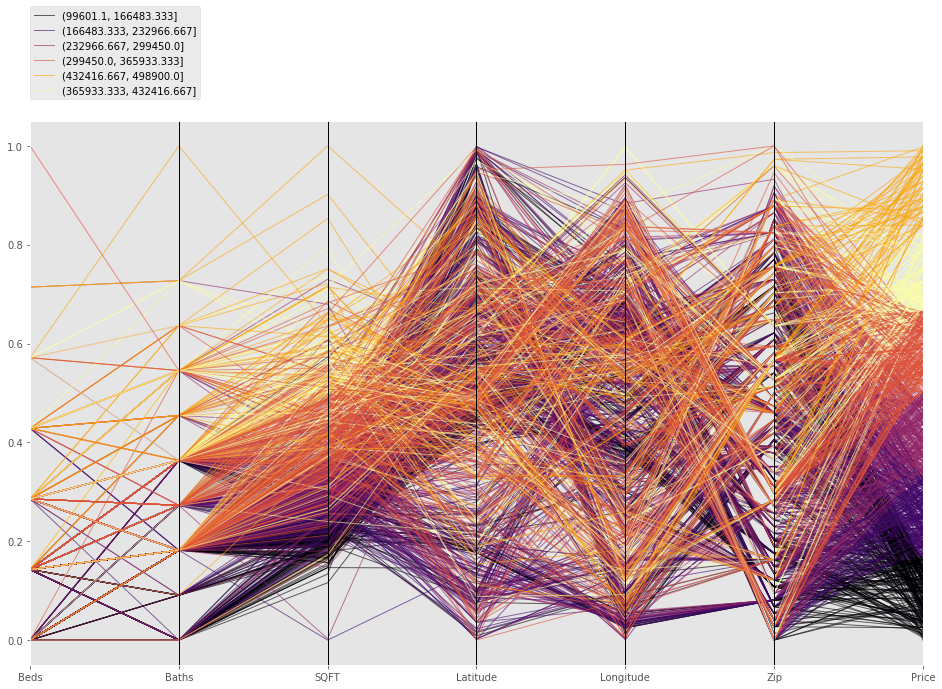

In [17]:
plt.figure(figsize=(16,10))
parallel_coordinates(scaleddf, class_column='Bins',colormap=cm.inferno, linewidth=1, alpha=0.6)
plt.legend(loc=(0,1.04));

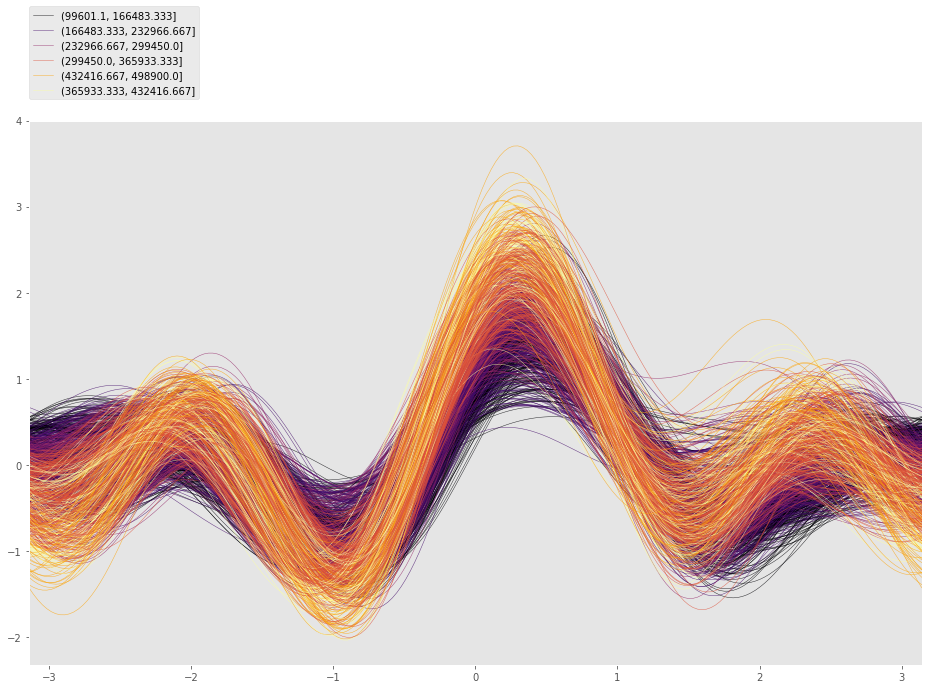

In [18]:
plt.figure(figsize=(16,10))
andrews_curves(scaleddf,class_column='Bins', colormap=cm.inferno, linewidth=0.5, alpha=0.8)
plt.legend(loc=(0,1.04));

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

/Users/adamlaw/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
# Create Feature Columns
feature_cols1 = ['Beds','Baths','SQFT','Latitude','Longitude','Zip']

In [21]:
X_initial = df.loc[:,feature_cols1]
y_initial = df.loc[:,'Price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_initial, y_initial, test_size=0.25)

In [23]:
RF = RandomForestRegressor(n_estimators=20, min_samples_split=4, min_samples_leaf=2)

In [24]:
from sklearn.model_selection import cross_val_score
initial_score = cross_val_score(RF, X_initial, y_initial, scoring='neg_mean_absolute_error', cv=5)
initial_score = abs(np.mean(initial_score))

In [25]:
# Initial Score of our base Random Forest Regressor that we will later compare to our 
# Random Forest Regressor trained with the FourSquare data also
initial_score

47538.604896770536

In [26]:
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
# Additionally, I like to visualize the data with the train test split data
y_pred = RF.predict(X_test)

In [28]:
from sklearn import metrics

In [29]:
metrics.mean_absolute_error(y_test, y_pred)

40426.94627644394

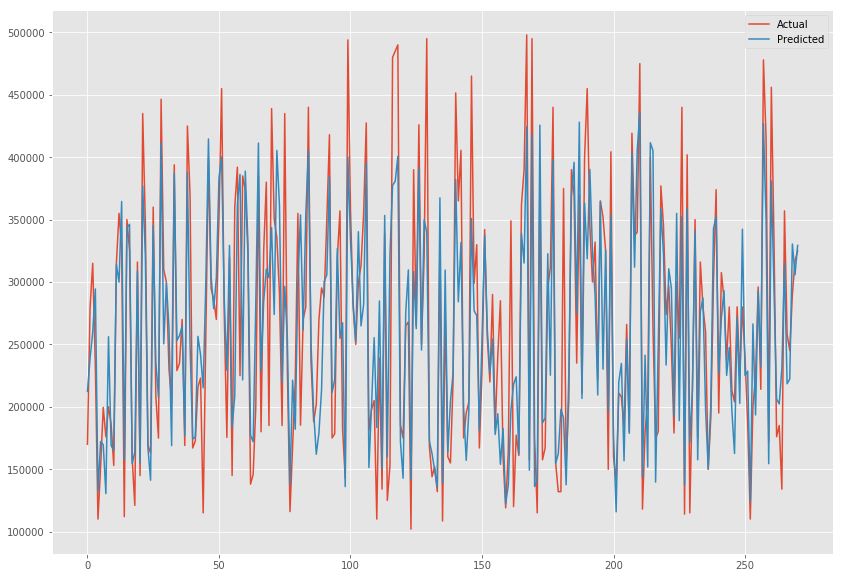

In [30]:
df2 = pd.DataFrame(np.c_[y_test.values, y_pred], columns=['Actual','Predicted'])
df2.plot(figsize=(14,10));

In [31]:
df.shape

(1083, 8)

In [32]:
# Foursquare Credentials
CLIENT_ID = 'XQR4HET2P2HOKVY2DUHNJ1SVSTEZAZRBUCTOWCZIDFWT2QBZ'
CLIENT_SECRET = 'VD4NUAAJYD041TPQTW3CQRZAZRMTGAAG422GJGKOTRJQFNTY'
VERSION = '20180605'
LIMIT = 200
radius = 700
search_query = 'trending'

In [33]:
#Get FourSquare API Data
results = []
for lat, lng, name in zip(df['Latitude'], df['Longitude'], df['Address']):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
    results.append(requests.get(url))
    print(name)

10080 Regent Park Dr # 2304, Orlando, FL 32825
2550 N Alafaya Trl Apt 12107
1802 Winter Green Blvd, Winter Park, FL 32792
886 Commonwealth Ct, Casselberry, FL 32707
510 Cranes Way Apt 201, Altamonte Springs, FL 32701
130 Clear Lake Cir, Sanford, FL 32773
50989 Highway 27 Lot 292, Davenport, FL 33897
4850 Sunset Rd, Saint Cloud, FL 34771
5455 Vineland Rd Apt 3209, Orlando, FL 32811
906 Ursula St, Ocoee, FL 34761
419 Wellesly Dr, Davenport, FL 33897
413 Carolina Ave, Saint Cloud, FL 34769
5930 Danube Way, Orlando, FL 32807
2305 Silver Palm Dr Apt 101, Kissimmee, FL 34747
6242 Hialeah St, Orlando, FL 32808
2730 Graduate Ct, Orlando, FL 32826
3019 Jon Jon Ct, Orlando, FL 32822
6120 Savage St, Saint Cloud, FL 34771
2586 Grand Central Pkwy Apt 2, Orlando, FL 32839
151 E Washington St Unit 201, Orlando, FL 32801
1042 Calabria Ave, Davenport, FL 33897
4748 Elkmont Rd, Orlando, FL 32808
140 Puelba Ln, Kissimmee, FL 34743
4765 Ormond Beach Way, Kissimmee, FL 34746
8113 Alveron Ave, Orlando, FL 3

625 King St, Eustis, FL 32726
5378 Pale Horse Dr, Orlando, FL 32818
2702 Rio Pinar Lakes Blvd, Orlando, FL 32822
587 N Lake Ave, Apopka, FL 32712
2233 Ravenall Ave, Orlando, FL 32811
1507 Gattis Dr, Orlando, FL 32825
4002 Macdonough Ave, Orlando, FL 32809
259 Creekside Way, Orlando, FL 32824
12221 Augusta Woods Cir, Orlando, FL 32824
331 N Dollins Ave, Orlando, FL 32805
401 Terrace Ct, Sanford, FL 32773
3700 Idlebrook Cir Apt 208, Casselberry, FL 32707
1437 Dandelion Dr, Deltona, FL 32725
940 Douglas Ave Unit 105, Altamonte Springs, FL 32714
2460 Grand Central Pkwy Apt 6, Orlando, FL 32839
2550 N Alafaya Trl Apt 7303, Orlando, FL 32826
4801 Eggleston Ave, Orlando, FL 32804
6593 Queens Borough Ave Apt 202, Orlando, FL 32835
781 Hendrix Ave, Orlando, FL 32825
2813 W Amelia St, Orlando, FL 32805
565 E Orange St, Altamonte Springs, FL 32701
4221 Tangerine Ave, Sanford, FL 32773
457 S Netherwood Cres, Altamonte Springs, FL 32714
521 Lilac Rd, Casselberry, FL 32707
244 Heron Bay Cir, Lake Ma

329 Misty Oaks Run, Casselberry, FL 32707
16721 Rolling Green Dr, Clermont, FL 34714
1830 Madison Ivy Cir, Apopka, FL 32712
5108 Rishley Run Way, Mount Dora, FL 32757
2171 Beardsley Dr, Apopka, FL 32703
1285 Blessing St, Maitland, FL 32751
215 Alabama Ave, Saint Cloud, FL 34769
2906 Carrickton Cir, Orlando, FL 32824
2788 River Landing Dr, Sanford, FL 32771
3476 Arnel Dr, Winter Park, FL 32792
2356 Crescent Moon, Kissimmee, FL 34746
443 Brunswick Dr, Davenport, FL 33837
2113 Cree Trl, Casselberry, FL 32707
291 Torpoint Gate Rd, Longwood, FL 32779
2512 Winding Ridge Ave S, Kissimmee, FL 34741
724 Linton Ave, Orlando, FL 32809
8151 Robalo Dr, Orlando, FL 32825
5917 Navajo Way, Orlando, FL 32807
2492 Pine Chase Cir, Saint Cloud, FL 34769
385 Misty Oaks Run, Casselberry, FL 32707
2622 Oakington St, Winter Garden, FL 34787
8755 Butternut Blvd, Orlando, FL 32817
420 Ranch Trl, Casselberry, FL 32707
7701 Heritage Crossing Way, Reunion, FL 34747
1333 Silverthorn Dr, Orlando, FL 32825
2102 Athen

330 Buttonwood Dr, Kissimmee, FL 34743
9407 Tawnyberry St, Orlando, FL 32832
456 Buchannan Dr, Davenport, FL 33837
506 Deed Cir, Deltona, FL 32738
3050 Laurel Dr, Mount Dora, FL 32757
10710 Satinwood Cir, Orlando, FL 32825
2414 Sheffield Ave, Orlando, FL 32806
2212 Corbett Rd, Orlando, FL 32826
2061 Bonneville Dr, Orlando, FL 32826
511 Dew Drop Cv, Casselberry, FL 32707
1826 Florence Vista Blvd, Orlando, FL 32818
1115 Pinedale Dr, Davenport, FL 33897
333 Brunello Dr, Davenport, FL 33897
5401 Leighton Ln, Oviedo, FL 32765
2846 Cardassi Dr, Ocoee, FL 34761
331 Lazio Cir, Debary, FL 32713
712 Brayton Ln, Davenport, FL 33897
1615 Truman Rd, Orlando, FL 32807
2040 Bobtail Dr, Maitland, FL 32751
12648 Maribou Cir, Orlando, FL 32828
4213 Greenfern Dr, Orlando, FL 32810
733 Wessex Pl, Orlando, FL 32803
1102 W Winged Foot Cir, Winter Springs, FL 32708
9773 Bennington Chase Dr, Orlando, FL 32829
154 Sand Ridge Dr, Davenport, FL 33896
1201 Martin L King Dr, Orlando, FL 32805
401 Hilgard Cv, Sanfo

338 Raleigh Pl, Oviedo, FL 32765
1044 Wood Dale Cir, Oviedo, FL 32765
226 Enterprise Osteen Rd, Osteen, FL 32764
1102 Seafarer Ln, Winter Springs, FL 32708
2064 Prairie Sage Ln, Longwood, FL 32750
7004 Shadowood Cir, Mount Dora, FL 32757
16501 Arrowhead Trl, Clermont, FL 34711
13005 Summerlake Way, Clermont, FL 34711
4478 Saddleworth Cir, Orlando, FL 32826
2461 Island Dr, Longwood, FL 32779
808 Blairmont Ln, Lake Mary, FL 32746
2209 Oakington St, Winter Garden, FL 34787
10253 Love Story St, Winter Garden, FL 34787
2036 Red Bluff Ave, Apopka, FL 32712
10146 Newington Dr, Orlando, FL 32836
8940 Bridgeport Bay Cir, Mount Dora, FL 32757
2280 Backwater Ct, Oviedo, FL 32766
5591 White Heron Pl, Oviedo, FL 32765
3405 Windy Wood Dr, Orlando, FL 32812
8467 Via Bella Notte, Orlando, FL 32836
778 Oak Burl Ct, Sanford, FL 32771
102 S Interlachen Ave Apt 510, Winter Park, FL 32789
209 Barry Ct, Longwood, FL 32779
764 Jordon Ct, Oviedo, FL 32765
2908 Casabella Dr, Kissimmee, FL 34744
210 Shell Pt E,

1687 Carillon Park Dr, Oviedo, FL 32765
3057 Brook Stone Ter, Davenport, FL 33837
2509 Northampton Ave, Orlando, FL 32828
1842 Everhart Dr, Orlando, FL 32806
2824 Prince John Rd, Winter Park, FL 32792
1151 Reading Dr, Orlando, FL 32804
227 Shady Oaks Cir, Lake Mary, FL 32746
1832 Pine Bay Dr, Lake Mary, FL 32746
1823 Valley Wood Way, Lake Mary, FL 32746
674 Arbukle Ct, Winter Springs, FL 32708
163 Ross Lake Ln, Sanford, FL 32771
13608 Mirror Lake Dr, Orlando, FL 32828
2163 Northumbria Dr, Sanford, FL 32771
1774 Morning Sky Dr, Winter Garden, FL 34787
23536 Stream Ave, Sorrento, FL 32776
1159 Fountain Coin Loop, Orlando, FL 32828
30905 Lochmore Cir, Mount Plymouth, FL 32776
3320 Stonewood Ct, Orlando, FL 32806
4238 Bell Tower Ct, Belle Isle, FL 32812
8984 Savannah Park # 34, Orlando, FL 32819
989 Paddington Ter, Heathrow, FL 32746
154 Dartmouth Ln, Longwood, FL 32779
4729 Swansneck Pl, Winter Springs, FL 32708
361 Glenholly Ct, Casselberry, FL 32707
1062 Corkwood Dr, Oviedo, FL 32765
25

In [34]:
len(results)

1083

In [35]:
# create list of lists that we later turn into DataFrame
venueslist = []
errors = []
for c,name in enumerate(df.Address):
    try:
        venueslist.append([[name,
                    v['venue']['name'],
                    v['venue']['location']['lat'],
                    v['venue']['location']['lng'],
                    v['venue']['categories'][0]['name']] for v in results[c].json()['response']['groups'][0]['items']])
    except:
        # Error Handler
        errors.append(c)
print('Fousquare Error for result(s):',errors)

Fousquare Error for result(s): [13, 484]


In [36]:
def foursquaredf():
    dataframes = []
    for c,v in enumerate(venueslist):
            df = pd.DataFrame(venueslist[c],columns=['Address','Name','Long','Lat','category'])
            dataframes.append(df)
    # concat a list of dataframes to return one dataframe.
    foursquaredf = pd.concat(dataframes,axis=0)
    return foursquaredf

In [37]:
#DataFrame with Foursquare location data
foursquaredf = foursquaredf()
foursquaredf

Address  \
0   10080 Regent Park Dr # 2304, Orlando, FL 32825   
1   10080 Regent Park Dr # 2304, Orlando, FL 32825   
2   10080 Regent Park Dr # 2304, Orlando, FL 32825   
3   10080 Regent Park Dr # 2304, Orlando, FL 32825   
4   10080 Regent Park Dr # 2304, Orlando, FL 32825   
5   10080 Regent Park Dr # 2304, Orlando, FL 32825   
0                     2550 N Alafaya Trl Apt 12107   
1                     2550 N Alafaya Trl Apt 12107   
2                     2550 N Alafaya Trl Apt 12107   
3                     2550 N Alafaya Trl Apt 12107   
4                     2550 N Alafaya Trl Apt 12107   
5                     2550 N Alafaya Trl Apt 12107   
6                     2550 N Alafaya Trl Apt 12107   
0    1802 Winter Green Blvd, Winter Park, FL 32792   
1    1802 Winter Green Blvd, Winter Park, FL 32792   
2    1802 Winter Green Blvd, Winter Park, FL 32792   
3    1802 Winter Green Blvd, Winter Park, FL 32792   
4    1802 Winter Green Blvd, Winter Park, FL 32792   
5    1802 Winter Green Blvd, Winter Park, FL 32792   
6    1802 Winter Green Blvd, Winter Park, FL 32792   
7    1802 Winter Green Blvd, Winter Park, FL 32792   
8    1802 Winter Green Blvd, Winter Park, FL 32792   
9    1802 Winter Green Blvd, Winter Park, FL 32792   
10   1802 Winter Green Blvd, Winter Park, FL 32792   
11   1802 Winter Green Blvd, Winter Park, FL 32792   
12   1802 Winter Green Blvd, Winter Park, FL 32792   
13   1802 Winter Green Blvd, Winter Park, FL 32792   
0       886 Commonwealth Ct, Casselberry, FL 32707   
1       886 Commonwealth Ct, Casselberry, FL 32707   
2       886 Commonwealth Ct, Casselberry, FL 32707   
..                                             ...   
5           2805 Norris Ave, Winter Park, FL 32789   
6           2805 Norris Ave, Winter Park, FL 32789   
7           2805 Norris Ave, Winter Park, FL 32789   
8           2805 Norris Ave, Winter Park, FL 32789   
9           2805 Norris Ave, Winter Park, FL 32789   
10          2805 Norris Ave, Winter Park, FL 32789   
11          2805 Norris Ave, Winter Park, FL 32789   
12          2805 Norris Ave, Winter Park, FL 32789   
13          2805 Norris Ave, Winter Park, FL 32789   
14          2805 Norris Ave, Winter Park, FL 32789   
15          2805 Norris Ave, Winter Park, FL 32789   
16          2805 Norris Ave, Winter Park, FL 32789   
17          2805 Norris Ave, Winter Park, FL 32789   
18          2805 Norris Ave, Winter Park, FL 32789   
19          2805 Norris Ave, Winter Park, FL 32789   
20          2805 Norris Ave, Winter Park, FL 32789   
21          2805 Norris Ave, Winter Park, FL 32789   
22          2805 Norris Ave, Winter Park, FL 32789   
23          2805 Norris Ave, Winter Park, FL 32789   
24          2805 Norris Ave, Winter Park, FL 32789   
25          2805 Norris Ave, Winter Park, FL 32789   
26          2805 Norris Ave, Winter Park, FL 32789   
27          2805 Norris Ave, Winter Park, FL 32789   
28          2805 Norris Ave, Winter Park, FL 32789   
29          2805 Norris Ave, Winter Park, FL 32789   
30          2805 Norris Ave, Winter Park, FL 32789   
31          2805 Norris Ave, Winter Park, FL 32789   
32          2805 Norris Ave, Winter Park, FL 32789   
33          2805 Norris Ave, Winter Park, FL 32789   
34          2805 Norris Ave, Winter Park, FL 32789   

                                       Name       Long        Lat  \
0                                    Redbox  28.539360 -81.244690   
1                              CVS pharmacy  28.539705 -81.244564   
2                                     Shell  28.539863 -81.243891   
3                               Dollar Tree  28.541780 -81.244760   
4                SR-408 & Dean Rd / Exit 19  28.547272 -81.244395   
5                            Community Pool  28.545338 -81.238607   
0            Bubbalou's Bodacious Bar-B-Que  28.572892 -81.207165   
1                                Party City  28.572113 -81.209719   
2        Hilton Garden Inn Orlando East/UCF  28.571920 -81.206563   
3   

In [38]:
#create dummy variables Dataframe
newdf = pd.concat([foursquaredf.Address,pd.get_dummies(foursquaredf.Name)],axis=1)
newdf

Address  \
0   10080 Regent Park Dr # 2304, Orlando, FL 32825   
1   10080 Regent Park Dr # 2304, Orlando, FL 32825   
2   10080 Regent Park Dr # 2304, Orlando, FL 32825   
3   10080 Regent Park Dr # 2304, Orlando, FL 32825   
4   10080 Regent Park Dr # 2304, Orlando, FL 32825   
5   10080 Regent Park Dr # 2304, Orlando, FL 32825   
0                     2550 N Alafaya Trl Apt 12107   
1                     2550 N Alafaya Trl Apt 12107   
2                     2550 N Alafaya Trl Apt 12107   
3                     2550 N Alafaya Trl Apt 12107   
4                     2550 N Alafaya Trl Apt 12107   
5                     2550 N Alafaya Trl Apt 12107   
6                     2550 N Alafaya Trl Apt 12107   
0    1802 Winter Green Blvd, Winter Park, FL 32792   
1    1802 Winter Green Blvd, Winter Park, FL 32792   
2    1802 Winter Green Blvd, Winter Park, FL 32792   
3    1802 Winter Green Blvd, Winter Park, FL 32792   
4    1802 Winter Green Blvd, Winter Park, FL 32792   
5    1802 Winter Green Blvd, Winter Park, FL 32792   
6    1802 Winter Green Blvd, Winter Park, FL 32792   
7    1802 Winter Green Blvd, Winter Park, FL 32792   
8    1802 Winter Green Blvd, Winter Park, FL 32792   
9    1802 Winter Green Blvd, Winter Park, FL 32792   
10   1802 Winter Green Blvd, Winter Park, FL 32792   
11   1802 Winter Green Blvd, Winter Park, FL 32792   
12   1802 Winter Green Blvd, Winter Park, FL 32792   
13   1802 Winter Green Blvd, Winter Park, FL 32792   
0       886 Commonwealth Ct, Casselberry, FL 32707   
1       886 Commonwealth Ct, Casselberry, FL 32707   
2       886 Commonwealth Ct, Casselberry, FL 32707   
..                                             ...   
5           2805 Norris Ave, Winter Park, FL 32789   
6           2805 Norris Ave, Winter Park, FL 32789   
7           2805 Norris Ave, Winter Park, FL 32789   
8           2805 Norris Ave, Winter Park, FL 32789   
9           2805 Norris Ave, Winter Park, FL 32789   
10          2805 Norris Ave, Winter Park, FL 32789   
11          2805 Norris Ave, Winter Park, FL 32789   
12          2805 Norris Ave, Winter Park, FL 32789   
13          2805 Norris Ave, Winter Park, FL 32789   
14          2805 Norris Ave, Winter Park, FL 32789   
15          2805 Norris Ave, Winter Park, FL 32789   
16          2805 Norris Ave, Winter Park, FL 32789   
17          2805 Norris Ave, Winter Park, FL 32789   
18          2805 Norris Ave, Winter Park, FL 32789   
19          2805 Norris Ave, Winter Park, FL 32789   
20          2805 Norris Ave, Winter Park, FL 32789   
21          2805 Norris Ave, Winter Park, FL 32789   
22          2805 Norris Ave, Winter Park, FL 32789   
23          2805 Norris Ave, Winter Park, FL 32789   
24          2805 Norris Ave, Winter Park, FL 32789   
25          2805 Norris Ave, Winter Park, FL 32789   
26          2805 Norris Ave, Winter Park, FL 32789   
27          2805 Norris Ave, Winter Park, FL 32789   
28          2805 Norris Ave, Winter Park, FL 32789   
29          2805 Norris Ave, Winter Park, FL 32789   
30          2805 Norris Ave, Winter Park, FL 32789   
31          2805 Norris Ave, Winter Park, FL 32789   
32          2805 Norris Ave, Winter Park, FL 32789   
33          2805 Norris Ave, Winter Park, FL 32789   
34          2805 Norris Ave, Winter Park, FL 32789   

    "Path of Life" Chapin Station (West Orange Trail)  #1 Beauty Supply  \
0                                                   0                 0   
1                                                   0                 0   
2                                                   0                 0   
3                                                   0                 0   
4                                                   0                 0   
5                                                   0                 0   
0                                                   0                 0   
1                                                   0                 0   
2                  

In [39]:
# groupby 'Address' and aggregate with sum function; set a 1 if address has venue nearby
newdf = newdf.groupby('Address').sum().reset_index()

In [40]:
newdf

Address  \
0                  100 Stevenage Ct, Longwood, FL 32779   
1     1000 S Semoran Blvd Apt 817, Winter Park, FL 3...   
2                 10018 Sevington St, Orlando, FL 32825   
3                10033 Moorshire Cir, Orlando, FL 32829   
4                       1004 Ursula St, Ocoee, FL 34761   
5             10065 Cypress Knee Cir, Orlando, FL 32825   
6           1007 Birkdale Trl, Winter Springs, FL 32708   
7           10075 Baywater Breeze Dr, Orlando, FL 32827   
8        10080 Regent Park Dr # 2304, Orlando, FL 32825   
9                10085 Chardonnay Dr, Orlando, FL 32832   
10                 101 E Woodward Ave, Eustis, FL 32726   
11                10146 Newington Dr, Orlando, FL 32836   
12               1015 W Jefferson St, Orlando, FL 32805   
13             10160 Cypress Vine Dr, Orlando, FL 32827   
14    102 S Interlachen Ave Apt 510, Winter Park, FL...   
15      1021 S Hiawassee Rd Apt 3912, Orlando, FL 32835   
16                  1022 N Bumby Ave, Orlando, FL 32803   
17               10230 Fallsgrove St, Orlando, FL 32836   
18       10236 Regent Park Dr # 2003, Orlando, FL 32825   
19              1028 Casterton Cir, Davenport, FL 33897   
20                       1028 Nin St, Orlando, FL 32835   
21                   10330 Groton St, Orlando, FL 32817   
22              1034 Seneca Falls Dr, Orlando, FL 32828   
23               1042 Calabria Ave, Davenport, FL 33897   
24          10420 Kiplinger Ln # 238, Orlando, FL 32829   
25                 1044 Wood Dale Cir, Oviedo, FL 32765   
26             1049 Seminole Creek Dr, Oviedo, FL 32765   
27                 105 E Woodward Ave, Eustis, FL 32726   
28      1051 S Highland St Apt 6e, Mount Dora, FL 32757   
29    1054 Lotus Cove Ct Unit 632, Altamonte Springs...   
...                                                 ...   
1005        911 N Orange Ave Apt 141, Orlando, FL 32801   
1006        911 N Orange Ave Apt 310, Orlando, FL 32801   
1007              9114 Edenshire Cir, Orlando, FL 32836   
1008                912 Sunniland Dr, Orlando, FL 32808   
1009                9137 Oak Fern Dr, Orlando, FL 32832   
1010              9154 Bay Hill Blvd, Orlando, FL 32819   
1011                917 Patrick St, Kissimmee, FL 34741   
1012            9264 Lake Fischer Blvd, Gotha, FL 34734   
1013              936 Calabria Ave, Davenport, FL 33897   
1014          9360 Pecky Cypress Way, Orlando, FL 32836   
1015  940 Douglas Ave Unit 105, Altamonte Springs, F...   
1016  940 Douglas Ave Unit 145, Altamonte Springs, F...   
1017  940 Douglas Ave Unit 189, Altamonte Springs, F...   
1018          940 Whalebone Bay Dr, Kissimmee, FL 34741   
1019              9407 Tawnyberry St, Orlando, FL 32832   
1020               941 Waterbury Ln, Longwood, FL 32750   
1021       942 Bakewell Ct Apt 100, Lake Mary, FL 32746   
1022    9422 Myrtle Creek Ln Apt 805, Orlando, FL 32832   
1023    9441 Myrtle Creek Ln Apt 213, Orlando, FL 32832   
1024               946 Vineland Pl, Lake Mary, FL 32746   
1025                 9510 Darien Ave, Orlando, FL 32817   
1026         9527 Pine Terrace Ct, Windermere, FL 34786   
1027                      954 Pine St, Oviedo, FL 32765   
1028               969 Stonewood Ln, Maitland, FL 32751   
1029        9773 Bennington Chase Dr, Orlando, FL 32829   
1030               979 N Baker St, Mount Dora, FL 32757   
1031             989 Paddington Ter, Heathrow, FL 32746   
1032  Championsgate : Luxury Resort Townhomes, Champ...   
1033         Fairway At Providence, Davenport, FL 33837   
1034                Waterleigh, Winter Garden, FL 34787   

      "Path of Life" Chapin Station (West Orange Trail)  #1 Beauty Supply  \
0                                                     0                 0   
1                                                     0                 0   
2                                                     0                 0   
3                                                     0                 0   
4   

In [41]:
# now we merge our dummy data with the original housing data; Beds, Baths, SQFT, Zip, Latitude, Longitude
darthdf = newdf.merge(df,on='Address')
darthdf.shape

(1035, 4589)

In [42]:
# our darthdf DataFrame for training our regression
darthdf.head()

Address  \
0               100 Stevenage Ct, Longwood, FL 32779   
1  1000 S Semoran Blvd Apt 817, Winter Park, FL 3...   
2              10018 Sevington St, Orlando, FL 32825   
3             10033 Moorshire Cir, Orlando, FL 32829   
4                    1004 Ursula St, Ocoee, FL 34761   

   "Path of Life" Chapin Station (West Orange Trail)  #1 Beauty Supply  \
0                                                  0                 0   
1                                                  0                 0   
2                                                  0                 0   
3                                                  0                 0   
4                                                  0                 0   

   #1 Providence Green  #2 Providence Green  #8 Providence Green  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   #9 Providence Green  1351 Glastonberry Rd  150dub  1618 Furniture   ...    \
0                    0                     0       0               0   ...     
1                    0                     0       0               0   ...     
2                    0                     0       0               0   ...     
3                    0                     0       0               0   ...     
4                    0                     0       0               0   ...     

   where turbo likes to poop  À La Cart  Ánh Hồng Restaurant  Beds  Baths  \
0                          0          0                    0     4    2.0   
1                          0          0                    0     2    2.0   
2                          0          0                    0     4    3.0   
3                          0          0                    0     3    2.5   
4                          0          0                    0     3    1.0   

   SQFT   Latitude  Longitude  Zip   Price  
0  2021  28.694466 -81.456121   38  315000  
1  1003  28.582404 -81.308629    2  110000  
2  2800  28.522116 -81.240912    0  373900  
3  1721  28.477519 -81.245522   65  230000  
4  1051  28.591719 -81.527482    9  165502  

[5 rows x 4589 columns]

In [43]:
# Set up our training features as a list of columns
feature_cols = darthdf.columns[1:-1]
target = darthdf.columns[-1]

In [44]:
# Using the 'loc' method, select all columns for training
X = darthdf.loc[:,feature_cols]
y = darthdf.loc[:, target]
# We will utilize train_test_split for a quick visualization like above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [45]:
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
y_pred = RF.predict(X_test)

In [47]:
# In addition to train test split for visualization, we are using cross val score
# for final comparasion.
Final_scores = cross_val_score(RF, X, y, scoring='neg_mean_absolute_error', cv=5)
Final_scores = abs(np.mean(Final_scores))

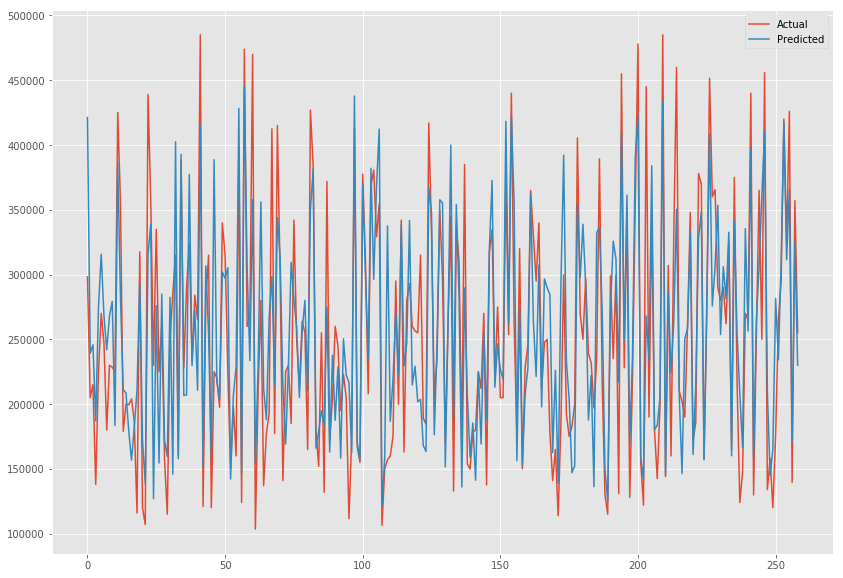

In [48]:
# Visualization of our Actual and Predicted data for the FourSquare Data RF Regressor
comp = pd.DataFrame(np.c_[y_test.values, y_pred],columns=['Actual','Predicted'])
comp.plot(figsize=(14,10));

In [49]:
metrics.mean_absolute_error(y_test, y_pred)

40738.03544233009

<h1>Results</h1>

In [50]:
#This is where we compare our estimator accuracies
print('Final Score for Base Estimator:',initial_score ,'// Final Score with Foursquare Data', Final_scores)

Final Score for Base Estimator: 47538.604896770536 // Final Score with Foursquare Data 42458.85154927293


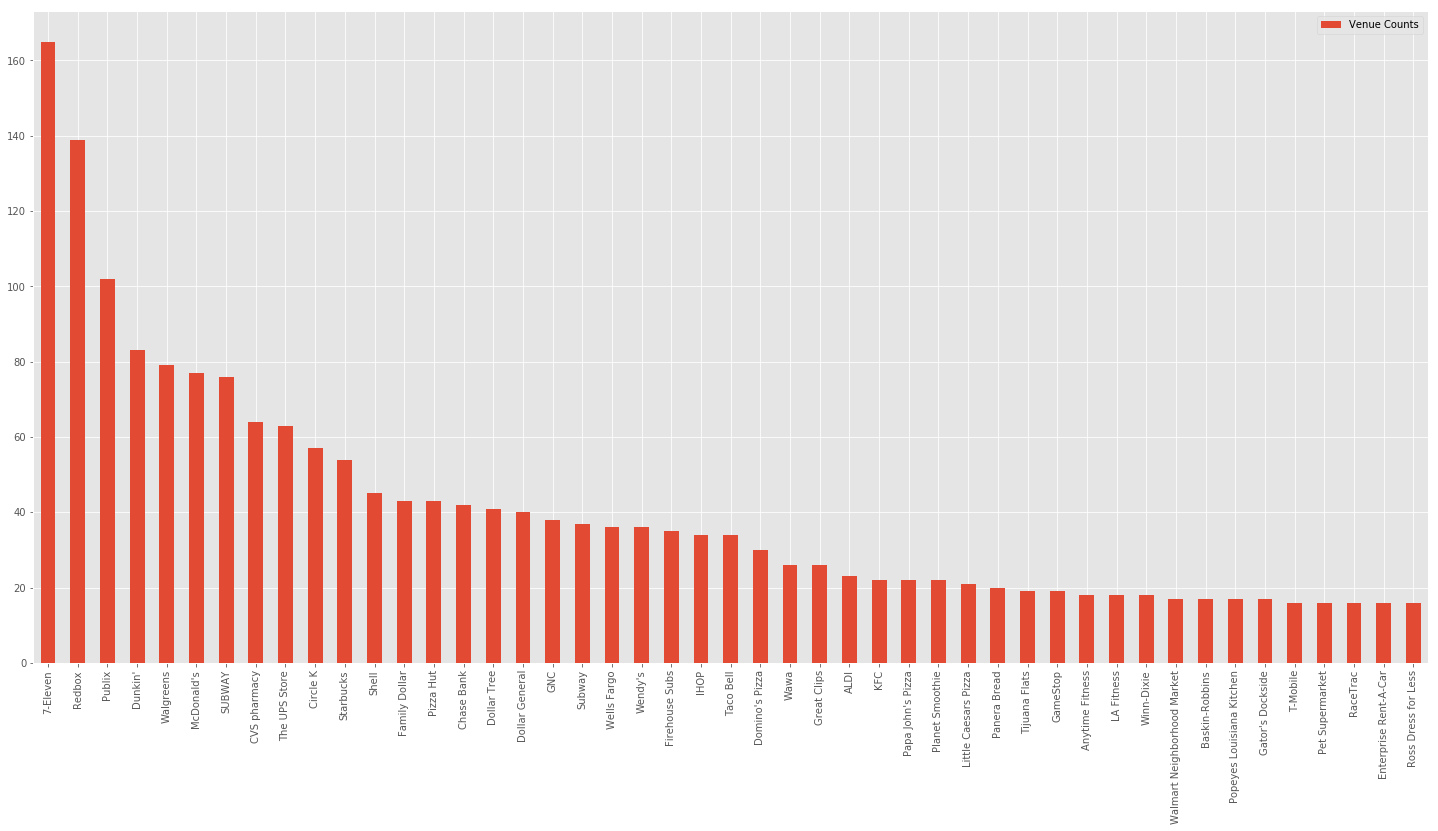

In [64]:
# Lets take a look at our top venues retreived from foursquare
venues = darthdf.iloc[:,1:-7].sum(axis=0).sort_values(ascending=False).to_frame()
venues.columns = ['Venue Counts']
venues.loc[venues['Venue Counts'] > 15].plot(kind='bar',figsize=(25,12));

<h1>Discussion</h1>

Our results show that our Mean Absoulute Error of our Base Estimator is reduced 
by adding our FourSquare data, so its does show that our hypthesis is correct.

Below, we'll look more closely at each venue's price behavior by performeing 'all else the same'testing and iterating through each venue to see the change in value from our Estimator.

For this section we will only use venues that have 3 responses or more to keep things relevant.
As using our RandomForestRegressor requires 2 data points per node.

In [52]:
# Create DataFrame where only venues with 3 or more data points.
mostPopular = venues.loc[venues['Venue Counts'] > 2].index
mostPopular = mostPopular.values.tolist()

In [53]:
mostPopular.extend(feature_cols1)
mostPopular[:20]

['7-Eleven',
 'Redbox',
 'Publix',
 "Dunkin'",
 'Walgreens',
 "McDonald's",
 'SUBWAY',
 'CVS pharmacy',
 'The UPS Store',
 'Circle K',
 'Starbucks',
 'Shell',
 'Family Dollar',
 'Pizza Hut',
 'Chase Bank',
 'Dollar Tree',
 'Dollar General',
 'GNC',
 'Subway',
 'Wells Fargo']

In [54]:
XX = darthdf.loc[:,mostPopular]
XX

7-Eleven  Redbox  Publix  Dunkin'  Walgreens  McDonald's  SUBWAY  \
0            0       0       0        0          0           0       0   
1            0       0       0        0          0           0       0   
2            0       0       0        0          0           0       0   
3            0       0       0        1          0           0       0   
4            0       0       0        0          0           0       0   
5            1       0       1        0          0           1       0   
6            0       0       0        0          0           0       0   
7            0       0       0        0          0           0       0   
8            0       1       0        0          0           0       0   
9            0       0       0        0          0           0       0   
10           0       0       0        0          0           0       0   
11           0       0       0        0          0           0       0   
12           0       0       0        0          0           0       0   
13           0       0       0        0          0           0       0   
14           1       0       0        0          0           0       0   
15           1       0       0        0          0           0       0   
16           0       0       0        0          0           0       0   
17           0       0       0        0          0           0       0   
18           0       1       0        0          0           0       0   
19           0       0       0        0          0           0       0   
20           0       0       0        0          0           0       0   
21           0       0       0        0          0           1       0   
22           0       0       0        0          1           0       0   
23           0       0       0        0          0           0       0   
24           0       0       0        0          0           0       0   
25           0       0       1        0          0           0       1   
26           0       0       0        0          0           0       0   
27           0       0       0        0          0           0       0   
28           0       0       0        0          0           0       0   
29           0       0       0        0          0           0       0   
...        ...     ...     ...      ...        ...         ...     ...   
1005         1       0       0        0          0           0       0   
1006         1       0       0        0          0           0       0   
1007         0       0       0        0          0           0       0   
1008         0       0       0        0          0           0       0   
1009         0       0       0        0          0           0       0   
1010         0       0       0        0          0           0       0   
1011         1       0       0        0          0           0       0   
1012         1       0       0        0          0           0       0   
1013         0       0       0        0          0           0       0   
1014         0       0       0        0          0           0       0   
1015         0       0       0        0          0           0       0   
1016         0       0       0        0          0           0       0   
1017         0       0       0        0          0           0       0   
1018         3       0       0        1          0           0       0   
1019         0       0       0        0          0           0       0   
1020         0       0       0        0          0           0       0   
1021         0       0       0        1          0           0       0   
1022         0       0       0        0          0           0       0   
1023         0       0       0        0          0           0       0   
1024         0       0       0        0          0           0       0   
1025         1       0       0        0          0           0       0   
1026         0       0       1        0          0           0       0   
1027      

In [55]:
# Because we retrined an estimator are greater than 3 datapoints lets check the score again
# to make sure we haven't reduced the score.
moreScores = []
moreScores.append(cross_val_score(RF, XX, y,cv=5,scoring='neg_mean_absolute_error'))
abs(np.mean(moreScores))

42800.83150908994

In [56]:
testList = venues.loc[venues['Venue Counts'] > 2].index
testList = testList.values.tolist()

In [57]:
# Create testdf to iterate through every venue separately to see how the Regressor Prices the outcome.
testdf = pd.DataFrame(testList, columns=['Venue'])
testdf = pd.get_dummies(testdf,)
testdf

Venue_16th Hole at Bay Hill  Venue_1884 Restaurant and Bar  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   
6                              0                              0   
7                              0                              0   
8                              0                              0   
9                              0                              0   
10                             0                              0   
11                             0                              0   
12                             0                              0   
13                             0                              0   
14                             0                              0   
15                             0                              0   
16                             0                              0   
17                             0                              0   
18                             0                              0   
19                             0                              0   
20                             0                              0   
21                             0                              0   
22                             0                              0   
23                             0                              0   
24                             0                              0   
25                             0                              0   
26                             0                              0   
27                             0                              0   
28                             0                              0   
29                             0                              0   
..                           ...                            ...   
811                            0                              0   
812                            0                              0   
813                            0                              0   
814                            0                              0   
815                            0                              0   
816                            0                              0   
817                            0                              0   
818                            0                              0   
819                            0                              0   
820                            0                              0   
821                            0                              0   
822                            0                              0   
823                            0                              0   
824                            0                              0   
825                            0                              0   
826                            0                              0   
827                            0                              0   
828                            0                              0   
829                            0                              0   
830                            0                              0   
831                            0                              0   
832                            0                              0   
833                            0                              0   
834                            0                              0   
835                            0                              0   
836                            0                              0   
837                            0                              0   
838                            0                    

In [58]:
RF = RandomForestRegressor(min_samples_split=2, min_samples_leaf=1)
RF.fit(XX,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
predictions = []
for index, row in testdf.iterrows():
    predictions.append(row.values.tolist())

In [60]:
for i in predictions:
    i.extend([darthdf['Beds'].mode(),darthdf['Baths'].mode(),darthdf['SQFT'].mean(),darthdf['Latitude'].mean(),darthdf['Longitude'].mean(),darthdf['Zip'].mode()])

In [61]:
# iterate through list of venues to see what impact each venue has on our price.
results = []
for i in predictions:
    results.append(RF.predict([i]).tolist()[0])

In [62]:
# Estimate of homes with all venues.
df3 = pd.DataFrame(np.c_[testdf.columns,results], columns=['Venue','Price'])
df3

Venue   Price
0                          Venue_16th Hole at Bay Hill  264140
1                        Venue_1884 Restaurant and Bar  271340
2                                   Venue_310 Lakeside  271340
3                            Venue_4 Rivers Smokehouse  271340
4                             Venue_4204 Oaktree Drive  271340
5                                           Venue_4B's  271340
6                                       Venue_64 North  271340
7                                       Venue_7-Eleven  271340
8                       Venue_8-8 Panda - Chinese Food  259640
9           Venue_A Second Chance Quality Consignments  271340
10                       Venue_ABC Fine Wine & Spirits  271340
11                                    Venue_ABC Liquor  271340
12                                          Venue_ALDI  271340
13                                          Venue_AT&T  271340
14                                    Venue_AT&T Store  275940
15                                 Venue_Abitare Salon  271340
16                     Venue_Academy Sports + Outdoors  271340
17                                 Venue_Adams Jewelry  271340
18                                       Venue_Adler’s  271340
19                         Venue_Affordable Lock & Key  271340
20                                    Venue_Agave Azul  271340
21                                       Venue_Aku Aku  271340
22                                Venue_Aladdin's Café  271340
23                                 Venue_Alafaya @ 408  295740
24                       Venue_Alafaya/Challenger Pkwy  271340
25       Venue_Altamonte CrossFit & Sports Performance  271340
26                      Venue_Alternative Dance Centre  271340
27                       Venue_American Karate Academy  272840
28                                        Venue_Amscot  271340
29                                         Venue_Amura  271340
..                                                 ...     ...
811                                     Venue_Wingstop  271340
812                                   Venue_Winn-Dixie  271340
813                     Venue_Winter Park Beer Company  271340
814                      Venue_Winter Park High School  271340
815               Venue_Winter Park YMCA Family Center  271340
816  Venue_Wireless - Verizon Wireless Premium Reta...  271340
817                                Venue_Wisteria Lane  271340
818                             Venue_Woof Gang Bakery  271340
819                                Venue_World of Beer  271340
820                            Venue_Xander Blue Salon  271340
821                     Venue_Yucatan Park Playgrounds  271340
822      Venue_Zaxby's Chicken Fingers & Buffalo Wings  271340
823                         Venue_Zaza New Cuban Diner  271340
824                               Venue_ZoDog Brewhaus  271340
825                              Venue_Zoo Health Club  271340
826                         Venue_cypress fairways gym  271340
827                               Venue_dd's DISCOUNTS  271340
828                           Venue_discount shop n go  271340
829                      Venue_el balcon latino buffet  271340
830                                          Venue_gym  271340
831                         Venue_mirador las lagrimas  271340
832                              Venue_ol times cigars  271340
833                            Venue_once upon a child  271340
834            Venue_premier baseball softball academy  271340
835                         Venue_riverside acres park  271340
836        Venue_stonewall jackson rd and semoran blvd  271340
837                  Venue_the sovereign dance academy  271340
838                   Venue_town center and orange ave  271340
839                         Venue_tropical Supermarket  271340
840                    Venue_wekiwa springs state park  271340

[841 rows x 2 columns]

<h1>Conclusion</h1>

The individual price impact of each venue can be shown in the visualization below.

With the increase in accuracy for our MAE, we can see how our regressor rates each venue in value added or subtracted from our target price estimate.

/Users/adamlaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


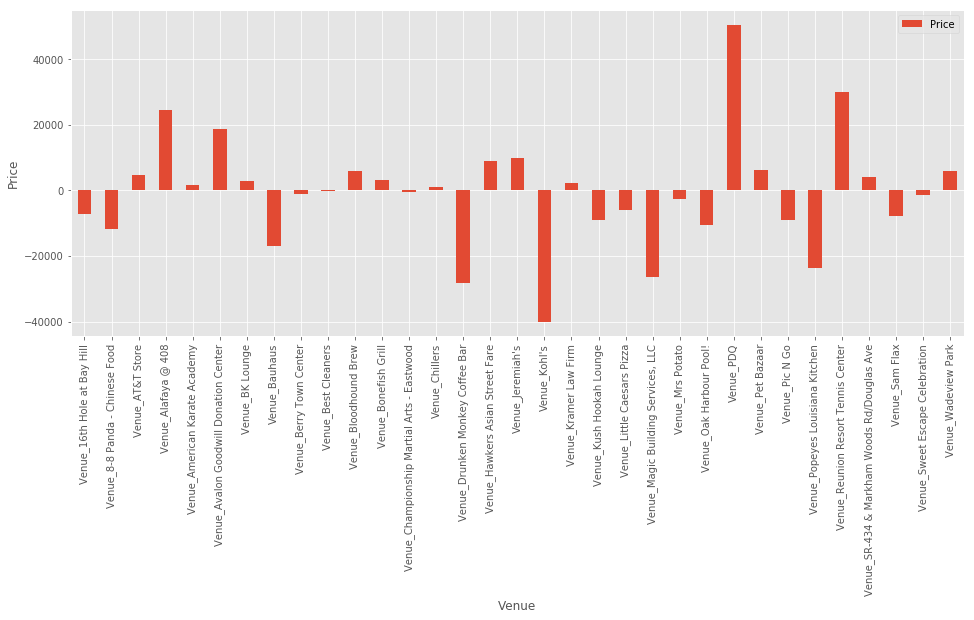

In [63]:
# Because most of our estimates are the same value, I want to focus on venues that add
# or subtract value from homes, so lets filter those out and have a look.
df3.Price= df3.Price.astype(int)
df4 = df3.loc[df3['Price'] != df3['Price'].mode().values[0]]
df4['Price'] = df4['Price'] - df3['Price'].mode().values[0]
df4.plot(kind='bar',x='Venue',figsize=(16,6))
plt.ylabel('Price');

Thanks for Viewing!